## Customer Churn Prediction



One of the most important applications of data science in the commercial sector is churn prediction. Its popularity stems from the fact that its impacts are more tangible to comprehend, and it plays a significant role in the company's overall revenues.

Churn is described as "when a client cancels a subscription to a service they have been utilizing" in business terms. People cancelling Spotify/Netflix memberships are a regular example. So, based on their utilization of the service, Churn Prediction is effectively projecting which clients are most likely to cancel a subscription, i.e. 'leave a company.'

From a business standpoint, obtaining this information is critical because recruiting new clients is generally more difficult and costly than retaining existing customers. As a result, the information acquired through Churn Prediction allows them to focus more on the customers who are most likely to leave.



<h4> Goal</h4>



- What features are significant in prediction the churn in a customer.
- To suggest measure in order to improve the retention rate with respect to customer category.



> 1 = Churned
>
>
> 0 = Not Churned



##### Importing Required Libraries



In [9]:
import pandas as pd # Data manipulation
import numpy as np # mathemetical operations
import seaborn as sns # Data visualization
import matplotlib.pyplot as plt # Data visualization
import plotly.express as px # Data visualization

from sklearn.metrics import recall_score


##### Import Dataset

In [10]:
churndf = pd.read_csv('data/Churn_Modelling.csv')

In [11]:
churndf.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##### Dataset Info

In [12]:
churndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        20000 non-null  int64  
 1   CustomerId       20000 non-null  int64  
 2   Surname          20000 non-null  object 
 3   CreditScore      20000 non-null  int64  
 4   Geography        20000 non-null  object 
 5   Gender           20000 non-null  object 
 6   Age              20000 non-null  int64  
 7   Tenure           20000 non-null  int64  
 8   Balance          20000 non-null  float64
 9   NumOfProducts    20000 non-null  int64  
 10  HasCrCard        20000 non-null  int64  
 11  IsActiveMember   20000 non-null  int64  
 12  EstimatedSalary  20000 non-null  float64
 13  Exited           20000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 2.1+ MB


##### Column Statistics

In [13]:
churndf.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000
mean,5000.500000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.53020,0.705500,0.515100,100090.239881,0.203700
std,2886.823503,7.193439e+04,96.650882,10.487544,2.892102,62395.845170,0.58164,0.455829,0.499784,57509.054966,0.402759
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.00000,0.000000,0.000000,11.580000,0.000000
25%,2500.750000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.00000,0.000000,0.000000,51002.110000,0.000000
50%,5000.500000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.00000,1.000000,1.000000,100193.915000,0.000000
75%,7500.250000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.00000,1.000000,1.000000,149388.247500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.00000,1.000000,1.000000,199992.480000,1.000000


##### Drop unnecessary columns

In [14]:
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
churndf.drop(columns_to_drop, axis=1, inplace = True)

##### Creating a heat\-map to assess the correlation between our variables.



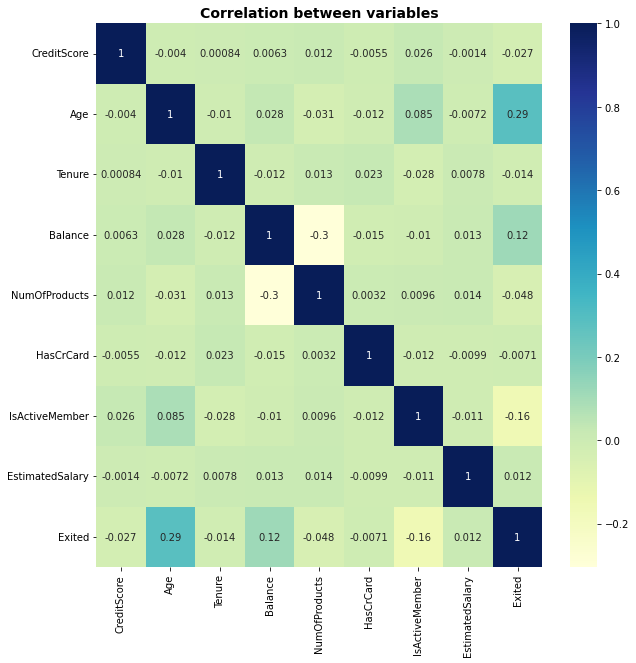

In [220]:
corr = churndf.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='YlGnBu', annot = True).set_title('Correlation between variables',fontdict= { 'fontsize': 14, 'fontweight':'bold'});

##### Assessing the proportions of our target value triggers to our defaults.



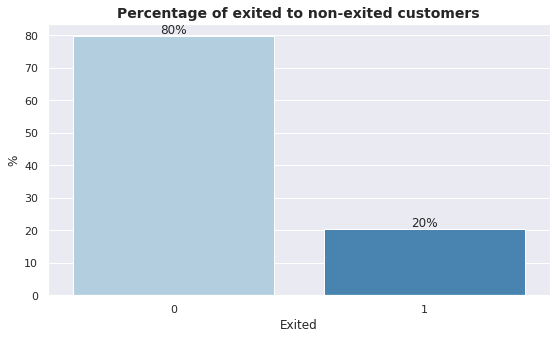

In [50]:
plt.figure(figsize=(9,5))
ax = sns.barplot(x='Exited', y='Exited', estimator=lambda x: len(x) / len(churndf) * 100, data=churndf, palette = 'Blues')
ax.bar_label(ax.containers[0], fmt='%.f%%')
ax.set_ylabel('%')
ax.set_title('Percentage of exited to non-exited customers',fontdict= { 'fontsize': 14, 'fontweight':'bold'});

This bar graph shows our percentage of exited to non\-exited customers. As shown, we have a large percentage of exited customers along with the opposite for non\-exited customers.



##### Creating count-plots for values that wouldn't be properly visualized by box plots due to being categorical.



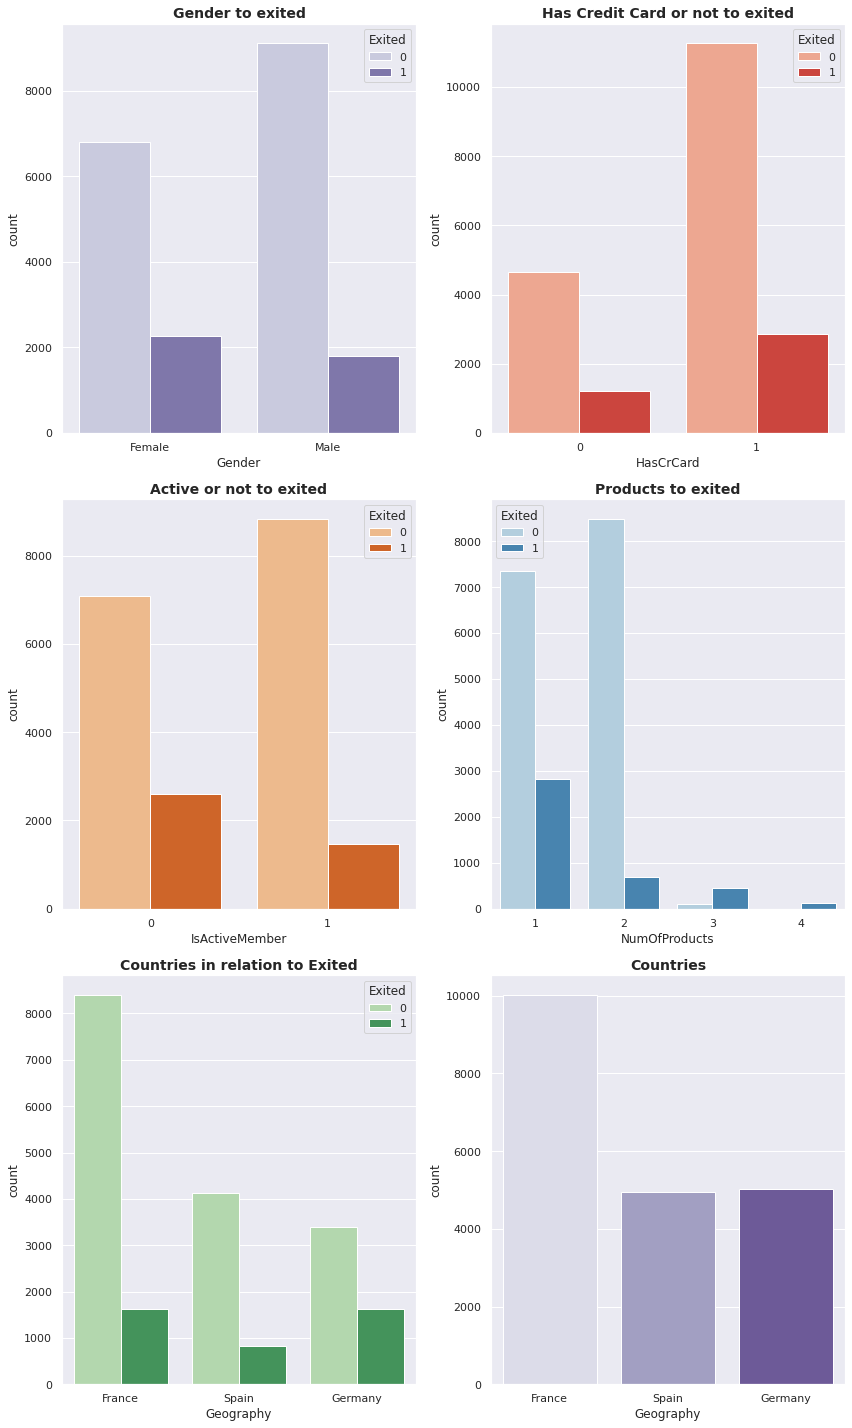

In [47]:
fig, axes = plt.subplots(3,2)
sns.set({'figure.figsize':(12,20)});
sns.countplot(data = churndf, x = 'Gender', hue = 'Exited', ax = axes [0,0], palette = 'Purples').set_title('Gender to exited',fontdict= { 'fontsize': 14, 'fontweight':'bold'})
sns.countplot(data = churndf, x = 'HasCrCard', hue = 'Exited', ax = axes [0,1], palette = 'Reds').set_title('Has Credit Card or not to exited',fontdict= { 'fontsize': 14, 'fontweight':'bold'})
sns.countplot(data = churndf, x = 'IsActiveMember', hue = 'Exited', ax = axes [1,0], palette = 'Oranges').set_title('Active or not to exited',fontdict= { 'fontsize': 14, 'fontweight':'bold'})
sns.countplot(data = churndf, x = 'NumOfProducts', hue = 'Exited', ax = axes [1,1], palette = 'Blues').set_title('Products to exited',fontdict= { 'fontsize': 14, 'fontweight':'bold'})
sns.countplot(data=churndf, x = 'Geography', hue = 'Exited', ax = axes[2,0], palette = 'Greens').set_title('Countries in relation to Exited',fontdict= { 'fontsize': 14, 'fontweight':'bold'})
sns.countplot(data = churndf, x = 'Geography', ax = axes[2,1], palette = 'Purples').set_title('Countries',fontdict= { 'fontsize': 14, 'fontweight':'bold'})
fig.tight_layout();

1\)Graph 1 shows the gender of the customer and whether or not they exited.

2\)Graph 2 shows whether or not the customer had a credit card or not when they exited.

3\)Graph 3 shows whether or not the customer that exited was an active member or not.

4\)Graph 4 shows the number of products a customer had compared to whether or not they exited.

5\)Graph 5 shows the country of the customer and whether or not the person exited.

6\)Shows the number of customers by country.



##### Creating box-plots to examine the spread of our data among multiple variables.



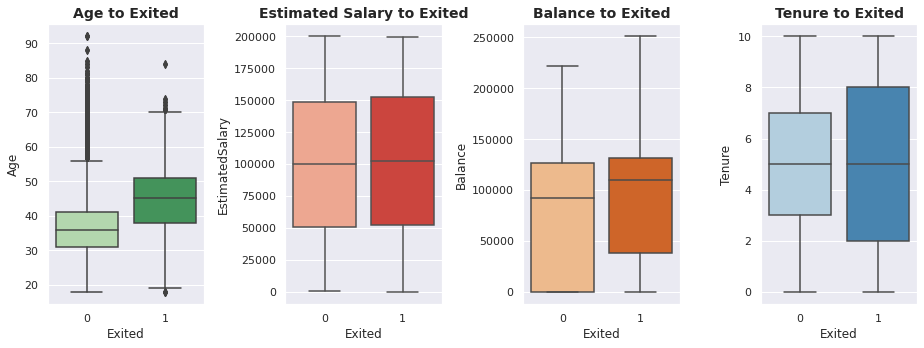

In [53]:
fig, axes = plt.subplots(1,4)
sns.set({'figure.figsize':(13,5)});
sns.boxplot(data = churndf, x = 'Exited', y = 'Age', ax = axes[0], palette = 'Greens').set_title('Age to Exited',fontdict= { 'fontsize': 14, 'fontweight':'bold'})
sns.boxplot(data = churndf, x = 'Exited', y = 'EstimatedSalary', ax = axes [1], palette = 'Reds').set_title('Estimated Salary to Exited',fontdict= { 'fontsize': 14, 'fontweight':'bold'})
sns.boxplot(data = churndf, x = 'Exited', y = 'Balance', ax = axes [2], palette = 'Oranges').set_title('Balance to Exited',fontdict= { 'fontsize': 14, 'fontweight':'bold'})
sns.boxplot(data = churndf, x = 'Exited', y = 'Tenure', ax = axes [3], palette = 'Blues').set_title('Tenure to Exited',fontdict= { 'fontsize': 14, 'fontweight':'bold'});
fig.tight_layout()

The box plots above show the relationship between multiple factors such as age, estimated salary, balance, and tenure, to whether they exited or not.



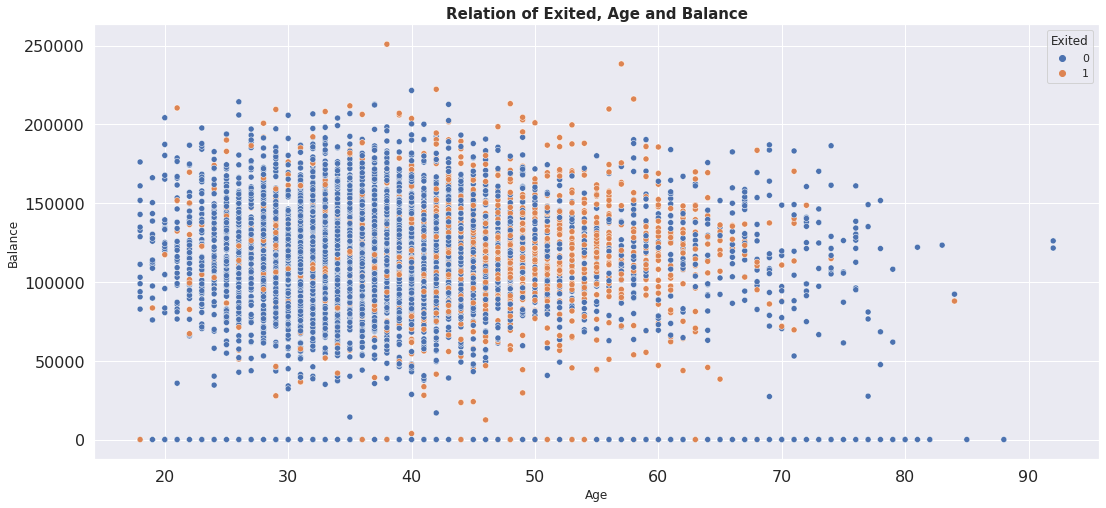

In [28]:
plt.figure(figsize=(18,8))
sns.scatterplot(x="Age", y="Balance", hue='Exited', data=churndf) #Importing three variables
plt.title('Relation of Exited, Age and Balance', fontsize=15, fontweight='bold') #Named and colored the plot
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

This scatter plot shows the relationship between the age and balance of the customers, and how that affects the number of people that have exited. 



##### Summary

- The dataset we chose includes multiple variables that describe customers at a bank. Our target is finding whether or not a customer will leave the bank, and our variable for that is Exited, with a value of 1 meaning that the customer has left, and a value of 0 meaning that the customer remains.
- Through our analysis of the correlation between variables, we found that all of the ones that we didn't remove played a small role in predicting whether or not the customer has exited or will exit \(as seen in our heat\-map\).
- Some of the variables we chose to analyze through exploratory data analysis were the age of the customer, their estimated salary, balance, tenure,
  gender, which country they were from, whether they had a credit card or not, how active they were, and the number of products they were utilizing from the bank.



In [15]:
dummies = pd.get_dummies(churndf["Gender"])
dummies.head()

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [16]:
churndf["Gender"] = dummies["Male"]
churndf.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [17]:
dummies2 = pd.get_dummies(churndf["Geography"])
dummies2.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [18]:
churndf['France'] = dummies2['France']
churndf['Spain'] = dummies2['Spain']
churndf['Germany'] = dummies2['Germany']

In [19]:
churndf.drop(['Geography'],axis = 1, inplace = True)

In [20]:
X = churndf.loc[:, churndf.columns != "Exited"]
Y = churndf['Exited']

In [22]:
from sklearn.metrics import accuracy_score,plot_precision_recall_curve, plot_roc_curve, ConfusionMatrixDisplay, auc, roc_auc_score, classification_report, confusion_matrix

### Splitting the Data



In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify = Y)

In [24]:
y_test.value_counts()


0    3185
1     815
Name: Exited, dtype: int64

#### **Logistic Regression**



In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
log = LogisticRegression()

In [27]:
log.fit(x_train, y_train)

LogisticRegression()

In [28]:
y_pred_log = log.predict(x_test)
y_pred_log

array([0, 1, 0, ..., 0, 0, 0])

In [29]:
recall_score(y_test, y_pred_log)

0.05644171779141104

<AxesSubplot:>

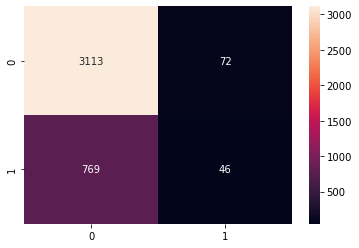

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='g')

In [31]:
from sklearn.model_selection import GridSearchCV

In [33]:
parameters = {
    'penalty' : ['l1','l2','elasticnet'], 
    'C'       : [0.001,0.01,0.1,1,10,100],
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [34]:
gs_lr = GridSearchCV(log, param_grid = parameters)

In [36]:
gs_lr.fit(x_train,y_train)

/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver

/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


/projects/384affd7-8fb5-487a-a2bf-30e2102843d9/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [37]:
y_pred_gs = gs_lr.predict(x_test)

In [38]:
print(classification_report(y_test, y_pred_gs))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      3185
           1       0.61      0.20      0.30       815

    accuracy                           0.81      4000
   macro avg       0.72      0.58      0.59      4000
weighted avg       0.78      0.81      0.77      4000



#### **KNeighbours Classifier**



In [0]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [0]:
k = 4
my_KNN_model = KNN(n_neighbors=k)

In [0]:
my_KNN_model.fit(x_train, y_train)

In [0]:
y_pred_knn = my_KNN_model.predict(x_test)
y_pred_knn

<AxesSubplot:>

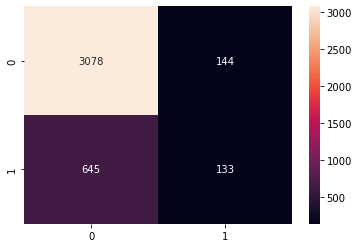

In [240]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='g')

In [241]:
recall_score(y_test, y_pred_knn)

0.17095115681233933

#### Naive Bayes



This uses Bayes Theorem which is: P\(A|B\) = P \(B|A\) . P \(A\) / P\(B\)

Good for well\-separated categories, very high\-dimensional data, and when data is matched by naive assumprtions.



In [242]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [243]:
y_pred_gnb = gnb.predict(X_test)

In [244]:
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_gnb)*100)

Gaussian Naive Bayes model accuracy(in %): 80.55


In [245]:
recall_score(y_test, y_pred_knn)

0.17095115681233933

<AxesSubplot:>

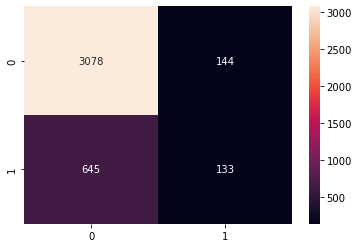

In [246]:
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='g')

#### Decision Tree Classifier



In [267]:
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

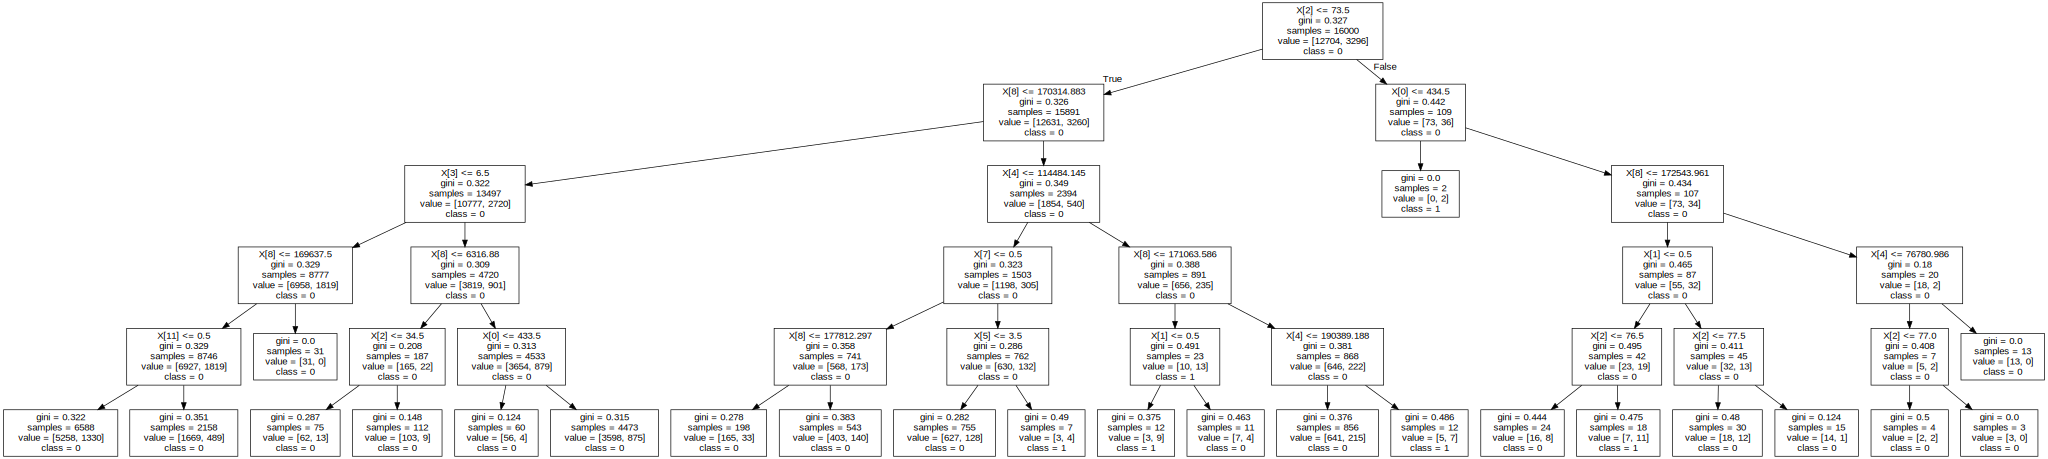

In [248]:
treeClassifier = DecisionTreeClassifier(max_depth=5)
treeClassifier.fit(X_train, y_train)

data = tree.export_graphviz(treeClassifier, class_names=['0', '1'], out_file=None)
graph = graphviz.Source(data)
graph

In [276]:
y_pred_dt = treeClassifier.predict(x_test)

In [0]:
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1)

In [290]:
grid.fit(X_train, y_train)

In [0]:
print(grid.best_params_) 
grid_predictions = grid.predict(X_test)

In [281]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3185
           1       0.50      0.01      0.01       815

    accuracy                           0.80      4000
   macro avg       0.65      0.50      0.45      4000
weighted avg       0.74      0.80      0.71      4000



<AxesSubplot:>

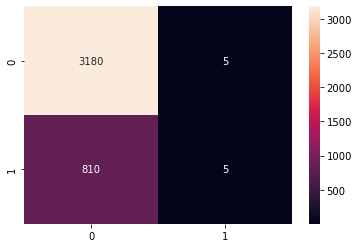

In [277]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='g')

#### Support Vector Classifier



In [249]:
from sklearn.svm import SVC

In [254]:
sv = SVC()
sv.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)

<AxesSubplot:>

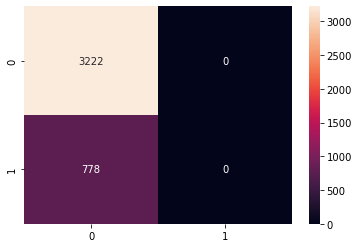

In [259]:
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt='g')

### `Random Forest Classifier`



In [275]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.datasets import make_classification as mc


In [286]:
churndf.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Spain,Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [0]:
clf = rfc(n_estimators = 100)

clf.fit(X_train, y_train)